In [1]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# Read Data

In [2]:
from os import listdir
from os.path import isfile, join
path = "../waitfor/"
files = [f for f in listdir(path) if isfile(join(path, f))]

In [3]:
files.sort()

In [4]:
waitfor = []
for file in files:
    with open(path+file) as f:
        lines = f.readlines()
        tmp = []
        count = 0
        first_zeros=True
        index = 0
        while count < 30:
            line = int(lines[index].split(": ")[1])
            if line == 0 and first_zeros:
                index+=1
                continue
            first_zeros = False
            tmp.append(line)
            index+=1
            count += 1
        waitfor.append(tmp)

# Plot

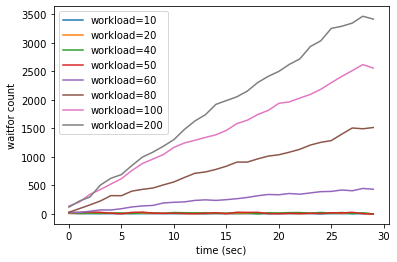

<Figure size 2560x1920 with 0 Axes>

In [5]:
# create data
x = list(range(30))
client_thread_count = [10, 100, 20, 200, 40, 50, 60, 80]
client_thread_to_waitfor = dict()
for i in range(len(client_thread_count)):
    client_thread_to_waitfor[client_thread_count[i]] = waitfor[i]
    
keys = client_thread_to_waitfor.keys()
for thread_count in sorted(keys):
    wait_num = client_thread_to_waitfor[thread_count]
    plt.plot(x, wait_num, label="workload="+str(thread_count))
    
plt.xlabel('time (sec)')
plt.ylabel('waitfor count')
plt.legend()
plt.savefig("waitfor.png", dpi=160)
plt.figure(figsize=(16, 12), dpi=160)
plt.show()

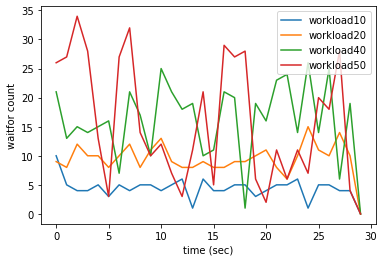

<Figure size 2560x1920 with 0 Axes>

In [6]:
# create data
remove = [200,100,80,60]
for i in remove:
    del client_thread_to_waitfor[i]
    
    
for thread_count in sorted(client_thread_to_waitfor):
    wait_num = client_thread_to_waitfor[thread_count]
    plt.plot(x, wait_num, label="workload"+str(thread_count))
    
plt.xlabel('time (sec)')
plt.ylabel('waitfor count')
plt.legend()
plt.savefig("waitfor_below.png", dpi=160)
plt.figure(figsize=(16, 12), dpi=160)
plt.show()

# Execution Throughput

In [8]:
from os import listdir
from os.path import isfile, join
path = "../buffer_size/"
files = [f for f in listdir(path) if isfile(join(path, f))]

In [9]:
files.sort()

In [10]:
throughput = []
for file in files:
    with open(path+file) as f:
        lines = f.readlines()
        tmp = []
        for line in lines:
            line = int(line.split(": ")[1])
            tmp.append(line)
        throughput.append(tmp)

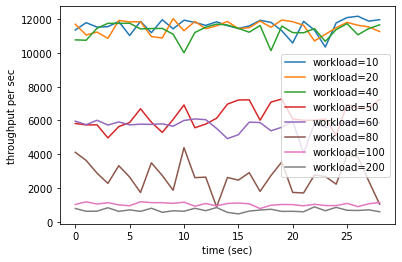

<Figure size 2560x1920 with 0 Axes>

In [11]:
# create data
x = list(range(29))
client_thread_count = [10, 100, 20, 200, 40, 50, 60, 80]
client_thread_to_throughput = dict()
for i in range(len(client_thread_count)):
    client_thread_to_throughput[client_thread_count[i]] = throughput[i]
    
keys = client_thread_to_throughput.keys()
for thread_count in sorted(keys):
    rate = client_thread_to_throughput[thread_count]
    plt.plot(x, rate, label="workload="+str(thread_count))
    
plt.xlabel('time (sec)')
plt.ylabel('throughput per sec')
plt.legend()
plt.savefig("throughtput.png", dpi=160)
plt.figure(figsize=(16, 12), dpi=160)
plt.show()